# **一、背景介绍**

冲击压缩在爆炸成型、武器侵彻、装甲防护和陨石撞击等国防工业及行星物理领域具有重要意义。材料在承受载荷快速加载时，内部会产生高温、高压、高应变率变形的极端条件。冲击载荷下材料内部变形过程十分复杂，涉及相变、位错等相互耦合，因而从原子角度出发去理解物质微观结构与热力学量的共演化过程十分重要。

在分子动力学模拟中研究冲击压缩的相关问题总体可以分为两大类。其一为**非平衡分子动力学（NEMD）模拟**，利用活塞沿样品的单轴方向进行移动，在体系内部产生冲击波，实时分析冲击波传播过程的热力学量与结构变化，能够获得包括弹塑性转变在内的非平衡过程。实现手段有：
- 动量镜方法，比较通用的冲击波模拟手段；
- 收缩边界法，常用于双波对撞；
- 飞片法，用于撞击产生冲击波；
- 移动窗口法，聚焦于波阵面的微观状态。

然而，由于NEMD方法计算量庞大，往往限制了对冲击状态的长时间观测，因此开发出另一类准稳态的模拟手段，具有代表性的方法为**多尺度冲击技术（MSST）**。其使用雨贡纽方程约束系统中原子的运动，能在较小的体系内便足以获得以一定速度运动的冲击波扫过后的准稳态，更方便于宽广相空间的探索与物质冲击状态性质的研究。

# **二、非平衡分子动力学（NEMD）模拟**

通过推动活塞在材料内部产生冲击波，根据不同的活塞施加方式可以得到不同形式的冲击加载

Cited from *J. Appl. Phys.* **131**, 051101 (2022); doi: 10.1063/5.0076266

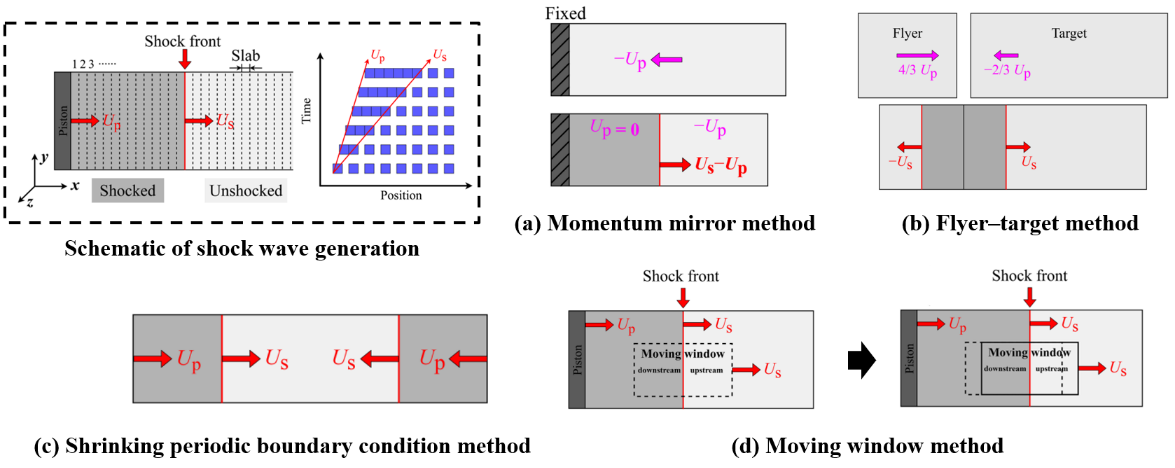

# **三、多尺度冲击技术（MSST）**

## **1. 理论介绍**

结合分子动力学和可压缩流动的欧拉方程，可以模拟材料在受冲击等极端条件下的状态。在定常冲击波速度下，使用**雨贡纽方程**将一个系统约束在以一定速度运动的冲击波扫过后的时间独立的稳态：

$$u=v_s(1-\dfrac{\rho_0}{\rho})$$
$$p-p_0=v_s^2\rho_0(1-\dfrac{\rho_0}{\rho})$$
$$e-e_0=p_0(\dfrac{1}{\rho_0}-\dfrac{1}{\rho})+\dfrac{v_s^2}{2}(1-\dfrac{\rho_0}{\rho})^2$$

其中，$u$，$\rho$，$p$ 和 $e$ 分别代表了粒子速度、密度、压力和单位质量的能量。在分子动力学系统中，采用拉格朗日方程执行上述的约束，可以得到系统的运动方程：

$$L=T(\{\dot{\vec{r_i}}\})-V(\{\vec{r_i}\})+\dfrac{1}{2}Q\dot{\nu}^2+\dfrac{1}{2}\dfrac{v_s^2}{\nu_0^2}(\nu_0-\nu)^2+p_0(\nu_0-\nu)$$
$$Q\ddot{\nu}^2=\dfrac{\partial T}{\partial \nu}-\dfrac{\partial V}{\partial \nu}-p_0-\dfrac{v_s^2}{\nu_0^2}(\nu_0-\nu)$$

其中，$T$，$V$，$Q$，和 $\nu$ 分别指代单位质量动能、势能、体积变化参数以及比体积。对于关联冲击波前后的状态方程，其始点和终点状态都是确定的，这样利用此方法可以使用小体系计算得到与大体系非平衡法分子动力学模拟相类似的热力学量、物理量及结构等结果。因而适合用于高效率地对宽温度密度区间进行采样，从而获得状态方程与结构特性。

## **2. LAMMPS实例运行**

### **(1) 案例文件的获取**

让我们通过以下命令获取本教程所需的数据，打开 Web Shell，在命令行输入

````shell
wget https://xxxxxxxxxxxxx  && unzip msst_tutorial.zip
````

解压缩后一共有三个文件
- **Au.cp.pb** 已准备好的势函数文件
- **in.equil** 弛豫的输入文件
- **in.msst**  运行MSST模拟的输入文件

### **(2) 弛豫结构-提交任务**

在进行冲击压缩模拟前，首先需要创建所需模拟的体系构型，并在**常温常压下进行弛豫**。\
在命令行输入以下命令创建独立文件夹 `equil/` ，并将案例文件中的弛豫输入文件拷贝到该文件夹下。

```shell
mkdir equil && cp msst_tutorial/in.equil equil/. && cp msst_tutorial/Au.cp.pb equil/.
```

进入`equil/` 文件夹，在命令行窗口在线编辑和保存 job.json 文件

```shell
cd equil/ && vi job.json
```

输入 `i` 进入编辑模式，完成修改后，按 `esc` 退出编辑模式后输入 `:` 进入末行命令符模式，然后输入 `wq` 保存并退出，配置文件内容如下：

**注意**：所有 ***"project_id":*** 后的 **0000** 均需替换为您自己的项目 ID ，可在“项目管理”页查看。另外，json文件的格式要求 {} 内最后一个字段后不要添加逗号，否则会有语法错误。

关于提交任务的相关教程可以参考 https://bohrium-doc.dp.tech/docs/quickstart/FirstRun

```json
{
    "job_name": "MSST_tutorial_equil",
    "command": "lmp -i in.equil > log",
    "log_file": "log",
    "backward_files": [],
    "project_id": 0000,
    "platform": "ali",
    "machine_type": "c4_m15_1 * NVIDIA T4",
    "job_type": "container",
    "image_address": "registry.dp.tech/dptech/deepmd-kit:2.1.5-cuda11.6"
}
```

使用 Lebesgue Utility 提交任务：

```shell
lbg job submit -i job.json -p ./
```

如下图所示为任务提交成功：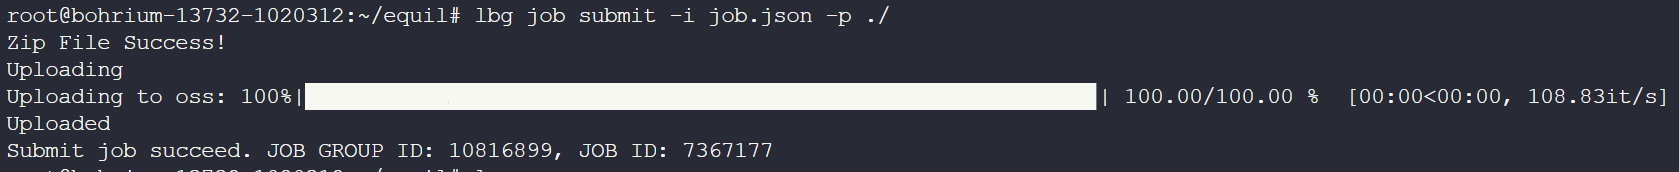

任务提交成功后可以回到控制台，在`Job`页面查看运行结果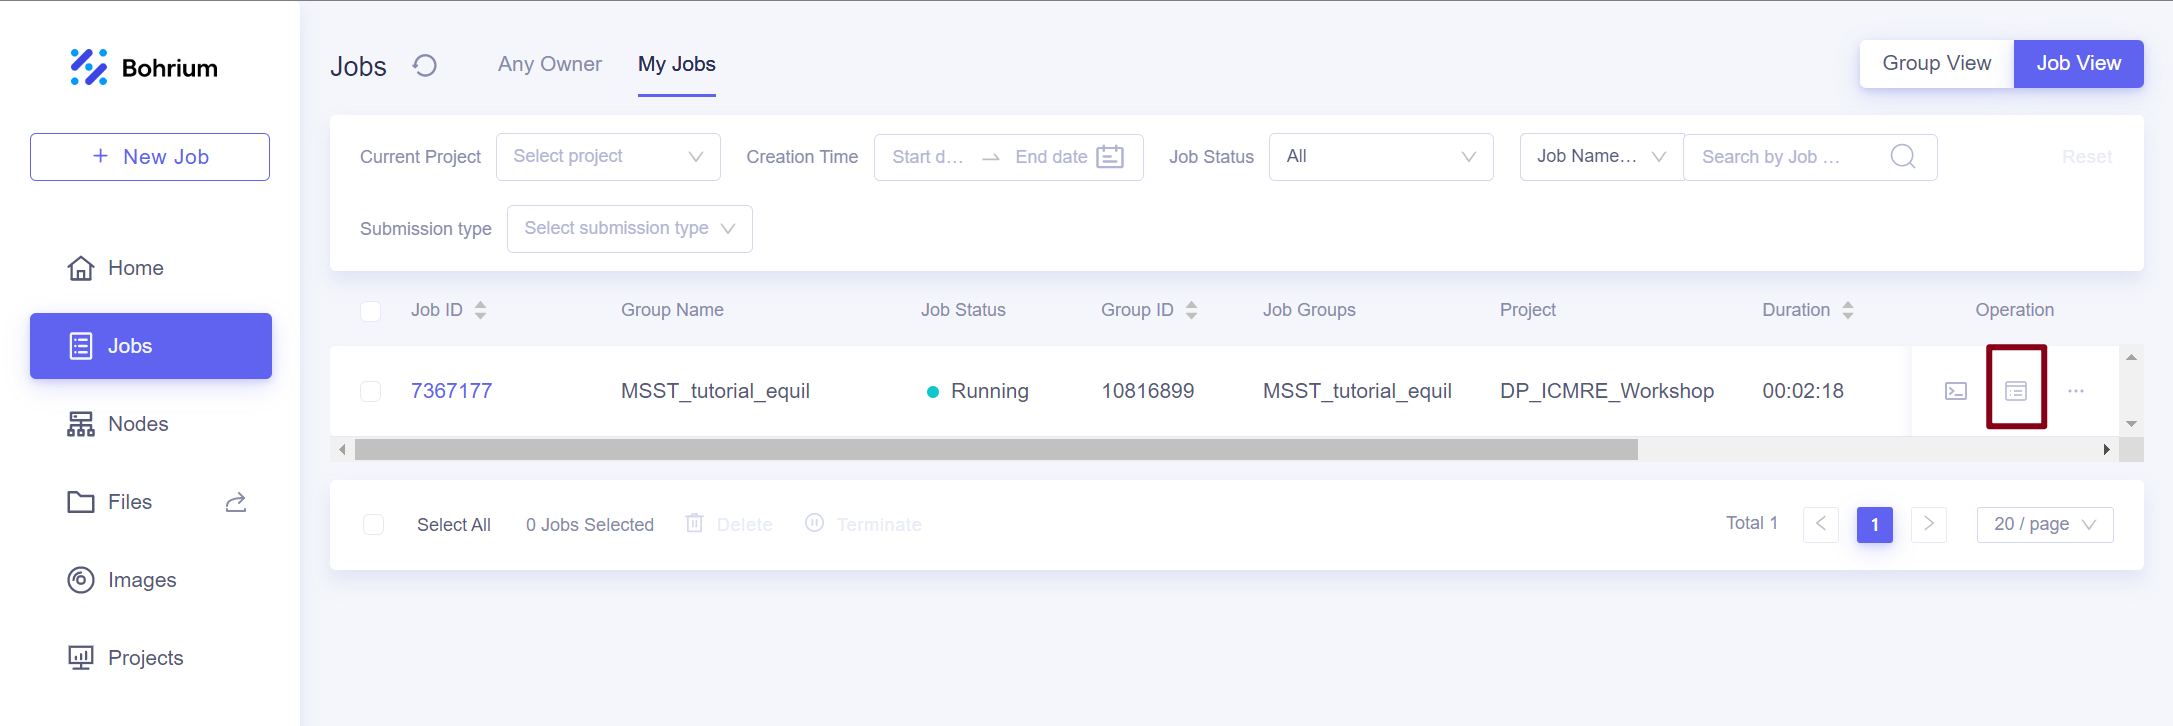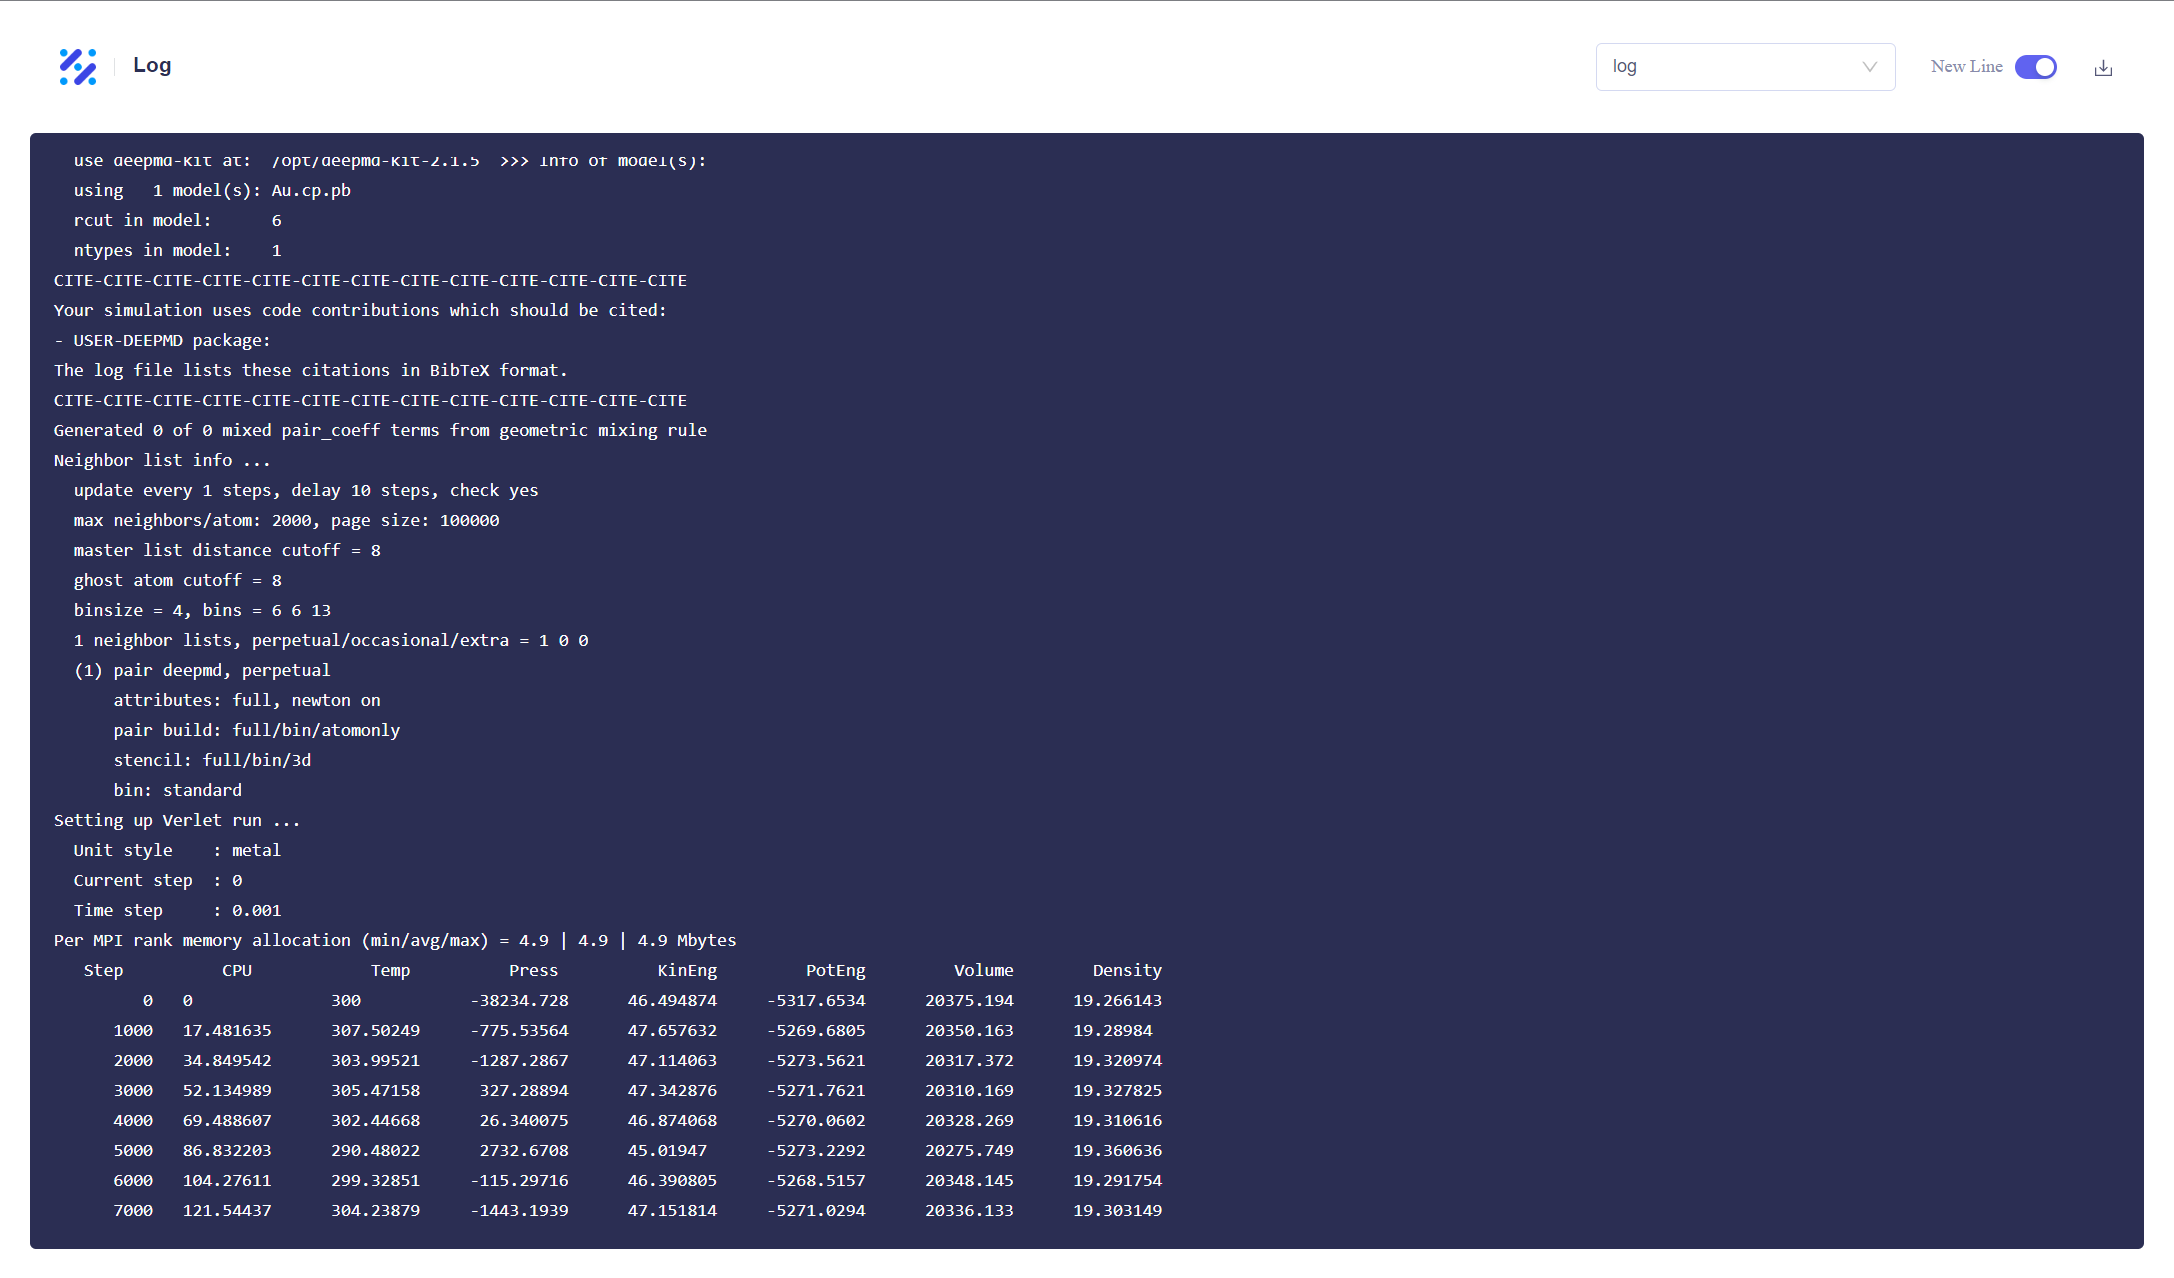

### **(3) 弛豫结构-结果下载**

在命令行输入以下命令，将弛豫完成的结果文件下载下来，其中`<JOB ID>`为刚刚提交时的任务ID

```shell
lbg job download <JOB ID>
```

此时我们可以看到文件夹下的计算结果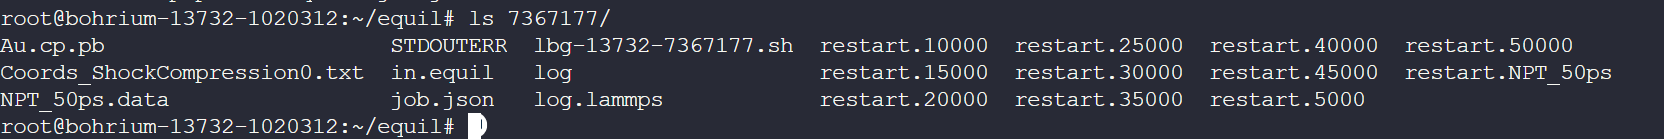

文件包括
- **Coords_ShockCompression0.txt** 轨迹文件
- **log.lammps** LAMMPS的输出文件
- **restart.xxx** 断点保存文件

这里`NPT_50ps.data`文件和`restart.NPT_50ps`文件为弛豫后的文件结构，将会用于后续的MSST模拟

### **(4) MSST模拟-提交任务**

运行以下命令创建独立的`msst`文件夹，并将**弛豫好的结构文件**及**势函数**拷贝至文件夹下

其中，`<JOB ID>`为刚刚提交弛豫任务的ID。

```shell
cd ~ && mkdir msst && cp equil/<JOB ID>/restart.NPT_50ps msst/. && cp msst_tutorial/Au.cp.pb msst/.
```

进入`msst/` 文件夹，在命令行窗口在线编辑和保存 job.json 文件

```shell
cd msst/ && vi job.json
```

输入 `i` 进入编辑模式，完成修改后，按 `esc` 退出编辑模式后输入 `:` 进入末行命令符模式，然后输入 `wq` 保存并退出，配置文件内容如下：

```json
{
    "job_name": "MSST_tutorial_msst",
    "command": "lmp -i in.msst > log",
    "log_file": "log",
    "backward_files": [],
    "project_id": 0000,
    "platform": "ali",
    "machine_type": "c4_m15_1 * NVIDIA T4",
    "job_type": "container",
    "image_address": "registry.dp.tech/dptech/deepmd-kit:2.1.5-cuda11.6"
}
```

使用 Lebesgue Utility 提交任务：

```shell
lbg job submit -i job.json -p ./
```

### **(5) MSST模拟-结果下载**

在命令行输入以下命令，将MSST模拟的结果文件下载下来，其中`<JOB ID>`为刚刚提交`MSST`任务时的任务ID

```shell
lbg job download <JOB ID>
```

此时我们可以看到输出文件下载到了`<JOB ID>`命名的文件夹内，同时可以将计算结果下载至本地目录，便于进一步的后处理分析。

```shell
cp -r <JOB ID> /data/workplace/.
```

通过在Notebook运行如下命令，可以查看传输文件夹的结果

In [1]:
! tree workplace/msst/7367398

workplace/msst/7367398
├── Au.cp.pb
├── Coords_ShockCompression_1.100000
├── Coords_ShockCompression_1.110000
├── Coords_ShockCompression_1.120000
├── Coords_ShockCompression_1.130000
├── Coords_ShockCompression_1.140000
├── Coords_ShockCompression_1.150000
├── Coords_ShockCompression_1.50000
├── Coords_ShockCompression_1.60000
├── Coords_ShockCompression_1.70000
├── Coords_ShockCompression_1.80000
├── Coords_ShockCompression_1.90000
├── Pressure1D_1.txt
├── Pressure2D_1.txt
├── RDF_1.txt
├── STDOUTERR
├── in.msst
├── job.json
├── lbg-13732-7367398.sh
├── log
├── log.lammps
├── output_1.txt
├── restart.100000
├── restart.110000
├── restart.120000
├── restart.130000
├── restart.140000
├── restart.150000
├── restart.60000
├── restart.70000
├── restart.80000
├── restart.90000
├── restart.NPT_50ps
└── restart_shock.1

0 directories, 34 files


文件包括
- **restart.xxx** 断点保存文件
- **Coords_ShockCompression_xxx** 轨迹文件
- **Pressure1D_xxx**  一维应力分布文件
- **Pressure2D_xxx**  二维应力分布文件
- **RDF_xxx**  径向分布函数文件
- **output_xxx**  热力学量输出文件

## **3. MSST结果后处理与分析**

### **(1) 热力学量分析**

读取output_xxx.txt文件，结合Python程序绘制不同的热力学量随时间变化

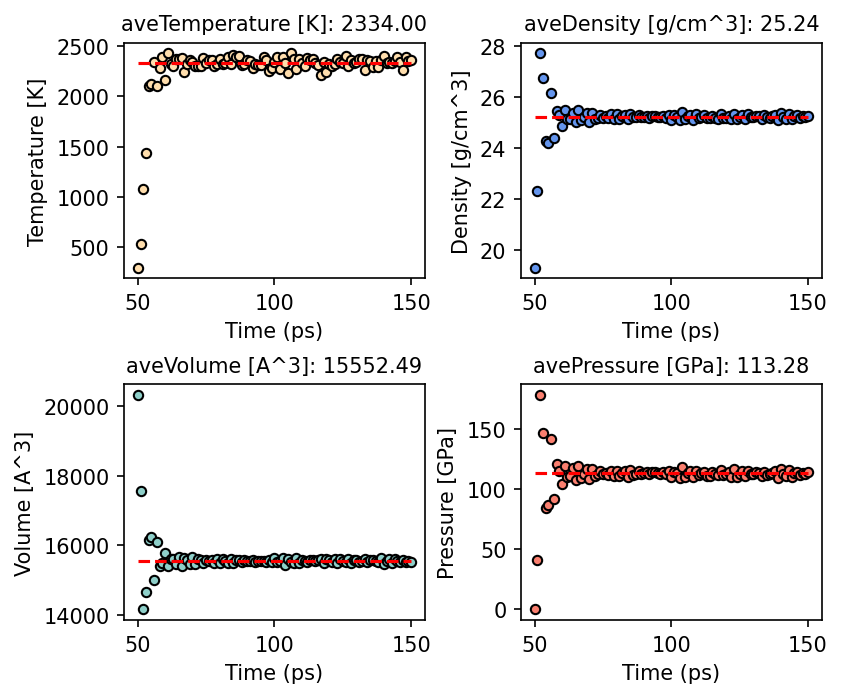

In [31]:
import sys
import numpy as np
import matplotlib.pyplot as plt

#-------------- Import Data -----------------#
filename = '/data/workplace/msst/7374336/output_50.txt'   # this should be changed
data = np.loadtxt(filename,skiprows=1)
data[:,4] /= 10000  # covert bar to GPa 

#----------- calculate average --------------#
Nrow,Ncol = np.shape(data)
avedata = np.mean(data[int(2*Nrow/3):,:],axis=0)

#-------------- Label sets ------------------#
color_lists = ['navajowhite','cornflowerblue','#8ECFC9','#FA7F6F']
label_lists = ['Temperature [K]','Density [g/cm^3]','Volume [A^3]','Pressure [GPa]']

#------------------ Plot --------------------#
# plot set
plotrow = 2
plotcol = 2
plotweight = plotcol*3
plotheight = plotrow*2.5
fig, axs=plt.subplots(plotrow,plotcol,figsize=(plotweight,plotheight),dpi=150)
plt.subplots_adjust(hspace=0.45, wspace=0.32)

for m, ax in enumerate(axs.flat):
    ax.set_xlabel('Time (ps)')
    ax.set_ylabel(label_lists[m])
    ax.scatter(data[:,0],data[:,m+1],marker='o',s=20,color=color_lists[m],edgecolors='k')
    ax.plot(data[:,0],np.tile((avedata[m+1]),(len(data[:,0]))),'--',linewidth=1.5,color='red')
    ax.set_title('ave'+label_lists[m]+': '+str(format(avedata[m+1],".2f")),fontsize=10)
plt.show()


### **(2) 径向分布函数分析**

读取RDF_xxx.txt文件，根据LAMMPS的in文件设置，每隔10ps计算输出一次RDF，MSST模拟总共运行100ps，可以输出十个时间序列下的RDF

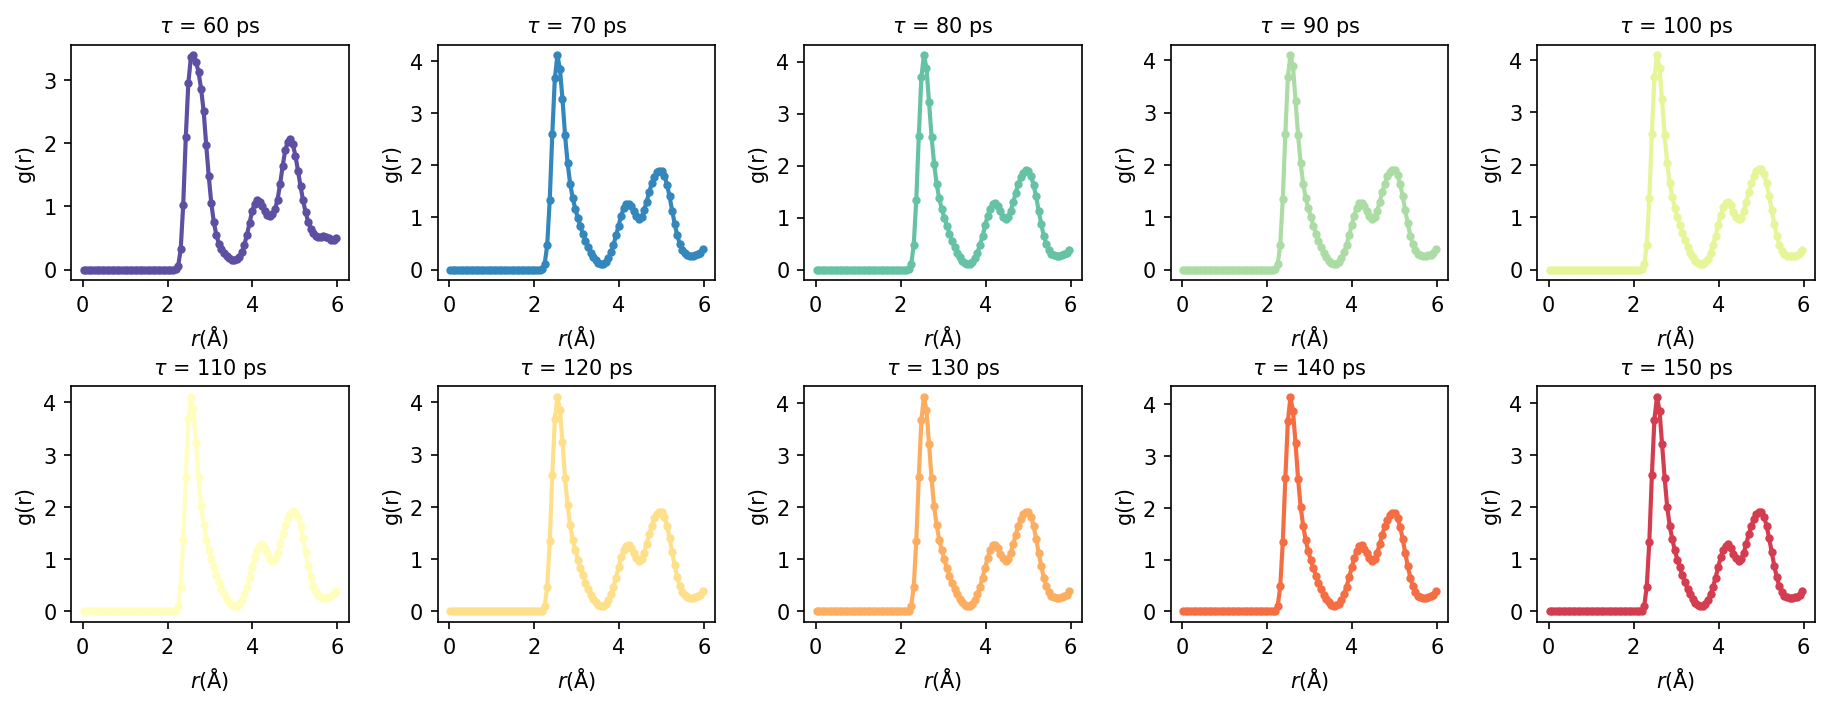

In [44]:
import sys
import numpy as np
import matplotlib.pyplot as plt

#-------------- Import Data -----------------#
filename = '/data/workplace/msst/7374336/RDF_50.txt'   # this should be changed
count = 0
for index, line in enumerate(open(filename,'r')):
    count += 1
    time_data = []
    rdf_data = []
    index = 3
    while(1):
        if index >=count:
            break
        else:
            head_info = np.loadtxt(filename,skiprows=index,max_rows=1)
            time_data.append(head_info[0]/1e3)
            temp = np.loadtxt(filename,skiprows=index+1,max_rows=int(head_info[1]))
            index += int(head_info[1]+1)
            rdf_data.append(temp)
rdf_data = np.array(rdf_data)
time_data = np.array(time_data)

#-------------- Label sets ------------------#
Ncolors = 10
colormap = plt.cm.Spectral_r
color_lists = [colormap(int(x*colormap.N/Ncolors)) for x in range(Ncolors)]

#------------------ Plot --------------------#
# plot set
plotrow = 2
plotcol = 5
plotweight = plotcol*3
plotheight = plotrow*2.5
fig, axs=plt.subplots(plotrow,plotcol,figsize=(plotweight,plotheight),dpi=150)
plt.subplots_adjust(hspace=0.45, wspace=0.32)

for m, ax in enumerate(axs.flat):
    ax.set_xlabel(r'$r \rm (\AA)$')
    ax.set_ylabel(r'g(r)')
    ax.plot(rdf_data[m,:,1],rdf_data[m,:,2],'o-',ms=3,linewidth=2,color=color_lists[m])
    ax.set_title(r'$\tau$ = ' + str(int(time_data[m])) + ' ps',fontsize=10)
plt.show()


### **(3) 结构演化**

读取Coords_ShockCompression_xxx.txt的轨迹文件，可以分析结构相变情况，以下程序通过坐标信息直接进行显示不同方向的投影（`X-Y`，`X-Z`，`Y-Z`），也可以借助**OVITO**等后处理软件进行分析

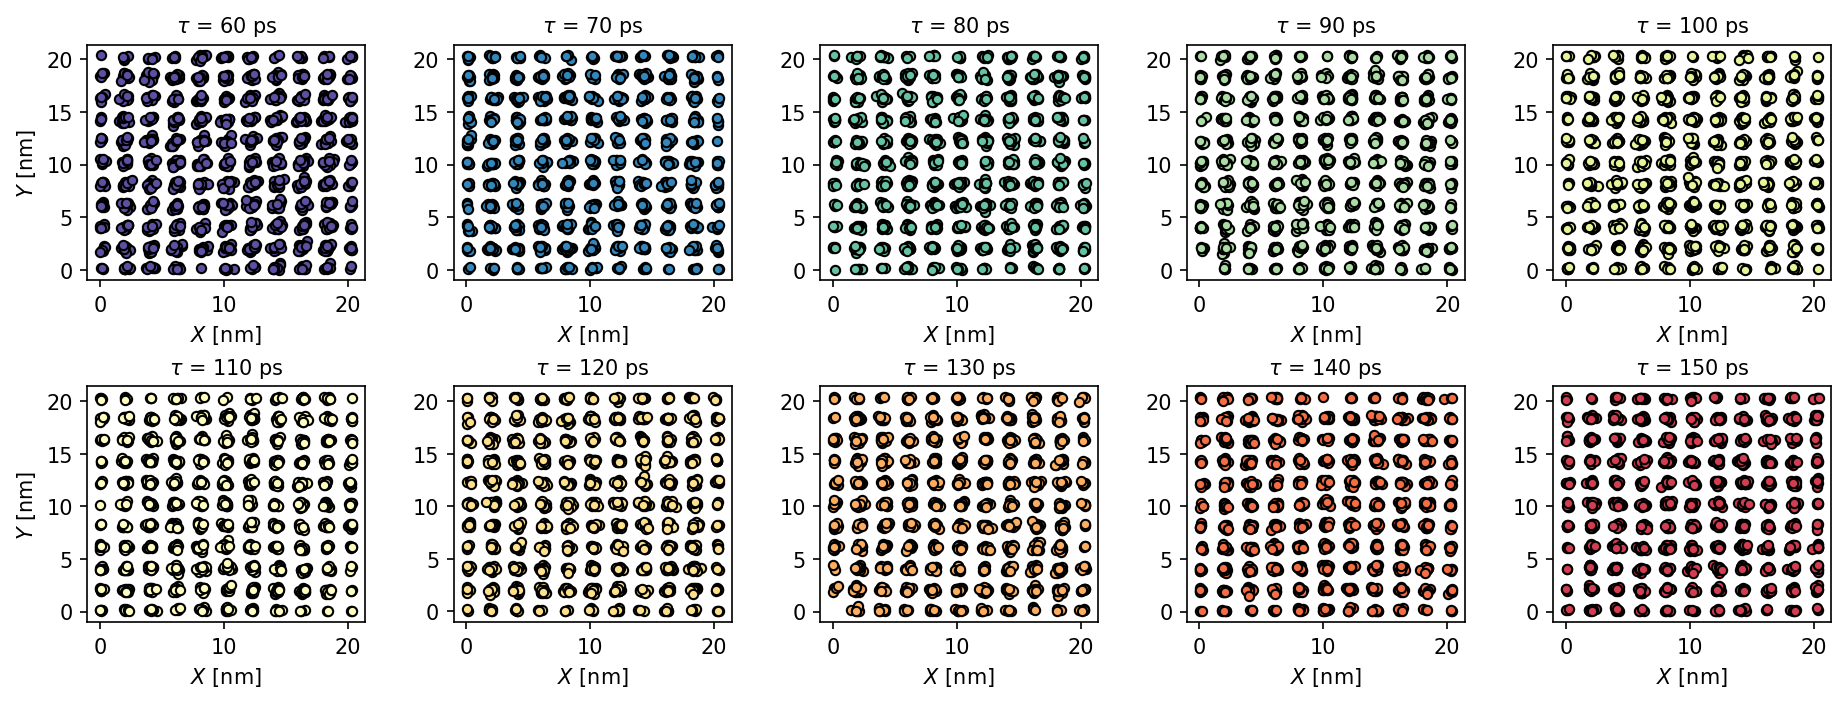

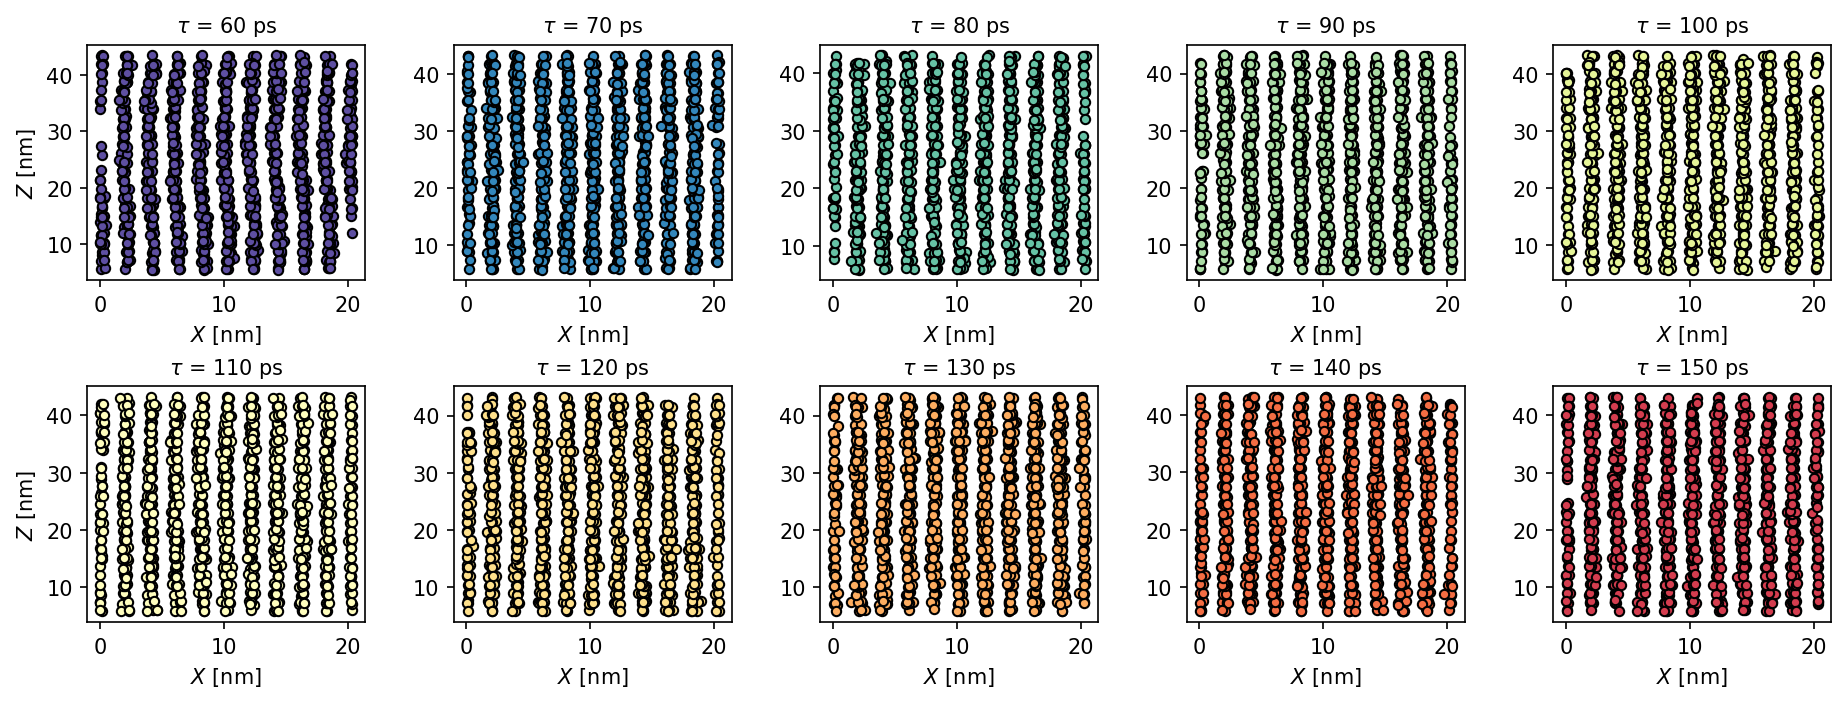

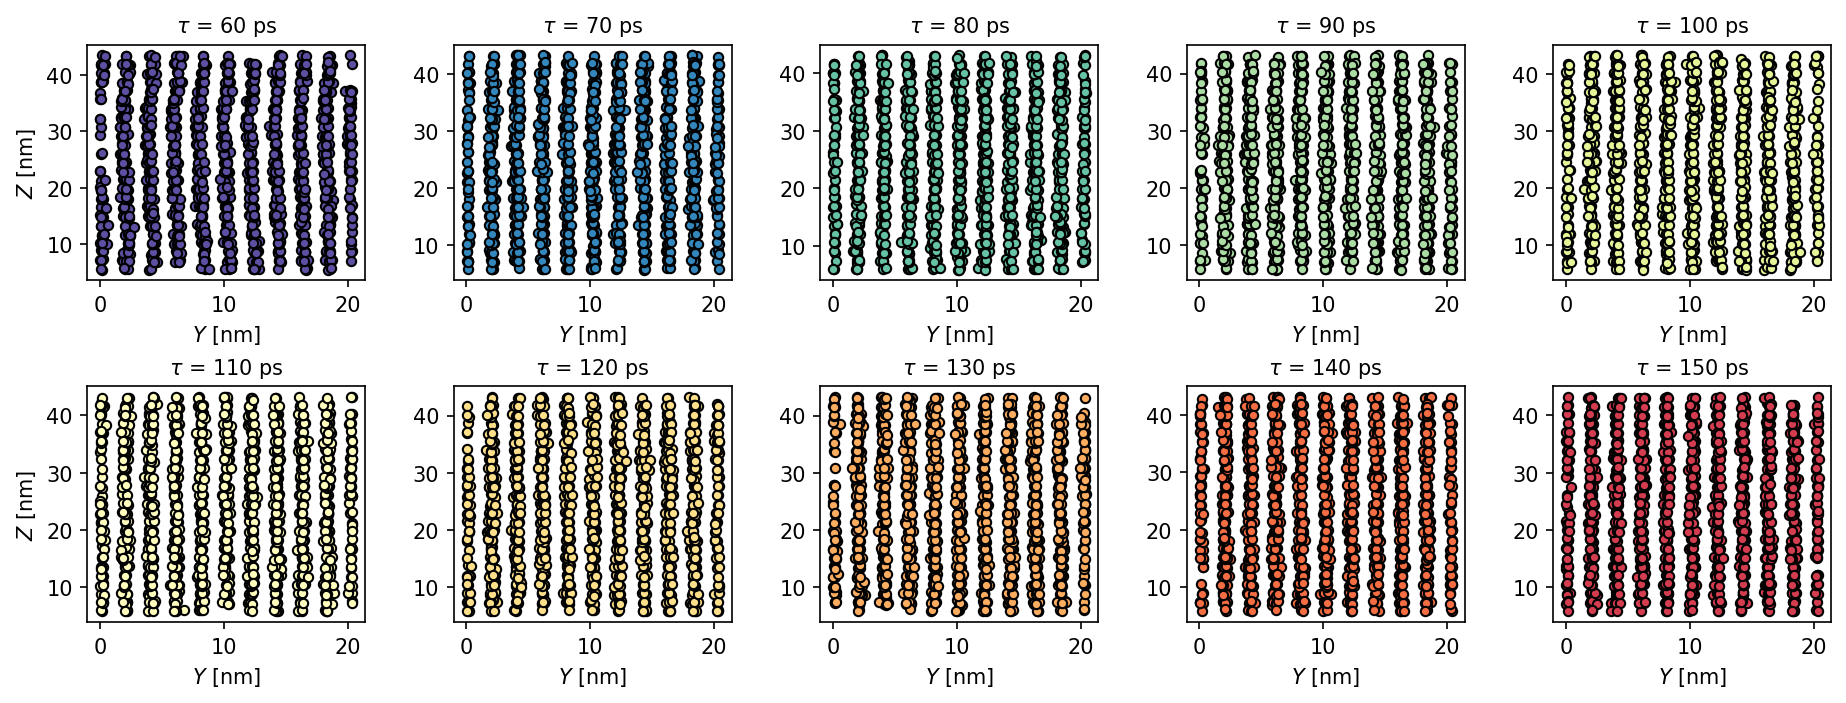

In [81]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker, cm

#-------------- Import Data -----------------#
PATH = '/data/workplace/msst/7374336/'
time = np.arange(60000,160000,10000)

#-------------- Label sets ------------------#
Ncolors = 10
colormap = plt.cm.Spectral_r
color_lists = [colormap(int(x*colormap.N/Ncolors)) for x in range(Ncolors)]

#------------------ Plot x-y --------------------#
# plot set
plotrow = 2
plotcol = 5
plotweight = plotcol*3
plotheight = plotrow*2.5
fig, axs=plt.subplots(plotrow,plotcol,figsize=(plotweight,plotheight),dpi=150)
plt.subplots_adjust(hspace=0.45, wspace=0.32)

for m, ax in enumerate(axs.flat):
    ax.set_xlabel(r'$X$ [nm]')
    data = np.loadtxt(PATH+'Coords_ShockCompression_50.'+str(time[m]),skiprows=9)
    
    x = data[:,2]
    z = data[:,3]
    ax.scatter(x,z,marker='o',s=20,color=color_lists[m],edgecolors='k')
    ax.set_title(r'$\tau$ = ' + str(int(time[m]/1000)) + ' ps',fontsize=10)

axs[0,0].set_ylabel(r'$Y$ [nm]')
axs[1,0].set_ylabel(r'$Y$ [nm]')
plt.show()

#------------------ Plot x-z --------------------#
# plot set
plotrow = 2
plotcol = 5
plotweight = plotcol*3
plotheight = plotrow*2.5
fig, axs=plt.subplots(plotrow,plotcol,figsize=(plotweight,plotheight),dpi=150)
plt.subplots_adjust(hspace=0.45, wspace=0.32)

for m, ax in enumerate(axs.flat):
    ax.set_xlabel(r'$X$ [nm]')
    data = np.loadtxt(PATH+'Coords_ShockCompression_50.'+str(time[m]),skiprows=9)
    
    x = data[:,2]
    z = data[:,4]
    ax.scatter(x,z,marker='o',s=20,color=color_lists[m],edgecolors='k')
    ax.set_title(r'$\tau$ = ' + str(int(time[m]/1000)) + ' ps',fontsize=10)

axs[0,0].set_ylabel(r'$Z$ [nm]')
axs[1,0].set_ylabel(r'$Z$ [nm]')
plt.show()

#------------------ Plot y-z --------------------#
# plot set
plotrow = 2
plotcol = 5
plotweight = plotcol*3
plotheight = plotrow*2.5
fig, axs=plt.subplots(plotrow,plotcol,figsize=(plotweight,plotheight),dpi=150)
plt.subplots_adjust(hspace=0.45, wspace=0.32)

for m, ax in enumerate(axs.flat):
    ax.set_xlabel(r'$Y$ [nm]')
    data = np.loadtxt(PATH+'Coords_ShockCompression_50.'+str(time[m]),skiprows=9)
    
    x = data[:,3]
    z = data[:,4]
    ax.scatter(x,z,marker='o',s=20,color=color_lists[m],edgecolors='k')
    ax.set_title(r'$\tau$ = ' + str(int(time[m]/1000)) + ' ps',fontsize=10)

axs[0,0].set_ylabel(r'$Z$ [nm]')
axs[1,0].set_ylabel(r'$Z$ [nm]')
plt.show()